Description:
Thera Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.
ID: Customer ID
Age: Customer’s age in completed years
Experience: #years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code
Family: the Family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have a securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

In [27]:
#Step 1: Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step2: Reading The Dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name= 'Data')
#print(df.head())
df.info()  # The data set has been updated from the info from within this project worksheet. 
# In the worksheet, its states Dtype int64 (integer): 8 attributes, Dtype float64 (float): 5 attributes, Dtype object (string): 1 attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [28]:
df[['Age', 'Income', 'CCAvg']].describe()

,Age,Income,CCAvg
count,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937913
std,11.463166,46.033729,1.747666
min,23.000000,8.000000,0.000000
25%,35.000000,39.000000,0.700000
50%,45.000000,64.000000,1.500000
75%,55.000000,98.000000,2.500000
max,67.000000,224.000000,10.000000


In [29]:
df[df['Personal Loan']==1][['Age', 'Income', 'CCAvg']].describe

<bound method NDFrame.describe of       Age  Income  CCAvg
9      34     180    8.9
16     38     130    4.7
18     46     193    8.1
29     38     119    3.3
38     42     141    5.0
...   ...     ...    ...
4883   38     129    4.1
4927   43     121    0.7
4941   28     112    1.6
4962   46     122    3.0
4980   29     135    5.3

[480 rows x 3 columns]>

In [30]:
# Dealing With Missing Values.
# Step 1: Find the Missing Values in the attributes
# Looks like the updated file has already been cleaned.
df.isna().sum()

sum(df.duplicated(subset = ['ID']))
# Remove Duplicate Values
df.drop_duplicates(subset = ['ID'], inplace= True)
sum(df.duplicated(subset = ["ID"]))

# Data Preperation
# Step 1: Drop Unneeded Columns
df = df.drop(["ID"], axis= 1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
# Step 2: View the Zip code data
df_county = pd.read_csv("ZIP_County.csv")
df_county.head()

,ZIP Code,County Name
0,36003,Autauga County
1,36006,Autauga County
2,36067,Autauga County
3,36066,Autauga County
4,36703,Autauga County


In [32]:
# Step 3 Merge the County name to the original dataframe
df = pd.merge(df,df_county, how = 'inner', on = 'ZIP Code')
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County Name
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Mateo County


In [33]:
# Remove Negative Values in Experience Column
print ('Shape Before Filtration: ', df.shape)
df = df[df['Experience']>0]
print('Shape After Filtration:', df.shape)

Shape Before Filtration:  (5376, 14)
Shape After Filtration: (5247, 14)


Text(0, 0.5, 'Counts')

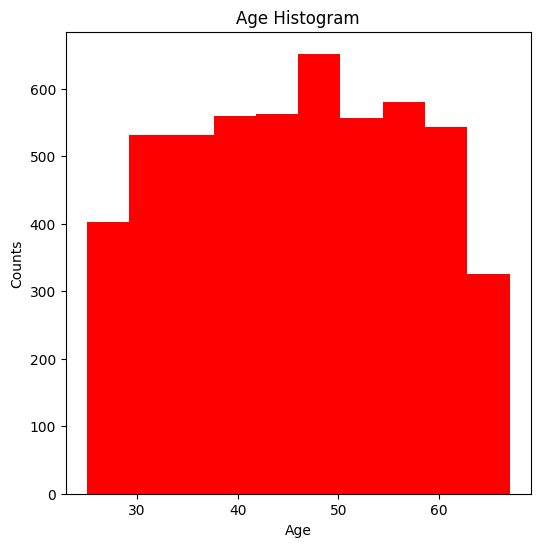

In [34]:
# EDA on Numerical columns | Numerical columns include Age, income, Experience, and CCAvg columns.
# Step 1: Find Histogram Distribution of Attribute
fig = plt.figure(figsize=(6, 6))
plt.hist(df['Age'], color = 'r')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')


Text(0, 0.5, 'Box Representation')

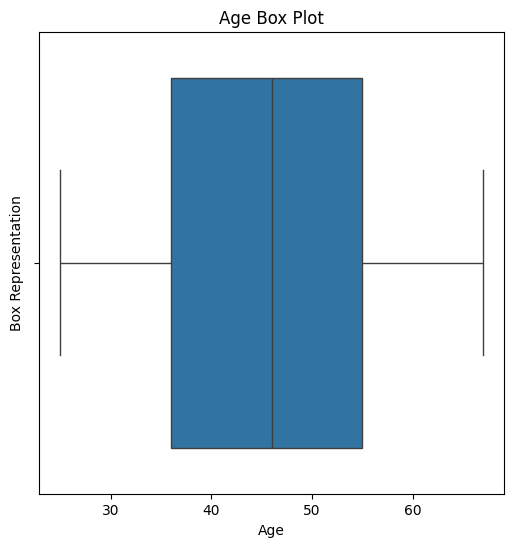

In [35]:
fig = plt.figure(figsize=(6, 6))
sns.boxplot(x = df["Age"])
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.ylabel('Box Representation')

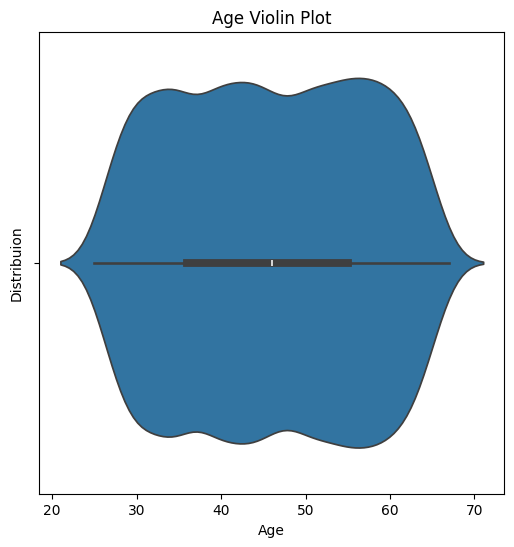

In [36]:
# Step 3: Plot Violin Plot to check the distribution of the data
fig = plt.figure(figsize=(6, 6))
sns.violinplot(x = df['Age'])
plt.title('Age Violin Plot')
plt.xlabel('Age')
plt.ylabel('Distribuion');

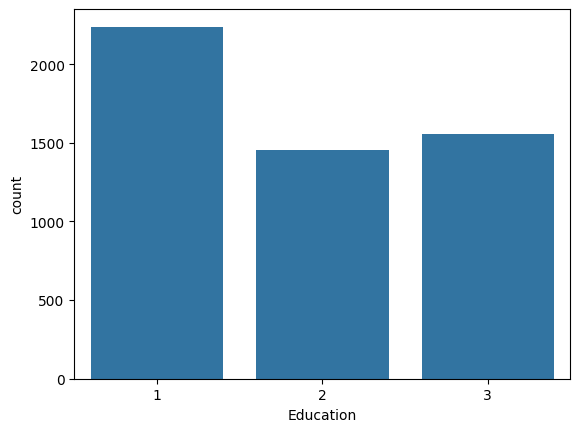

In [37]:
# Step 1: Education counts plot
sns.countplot(x="Education", data=df);

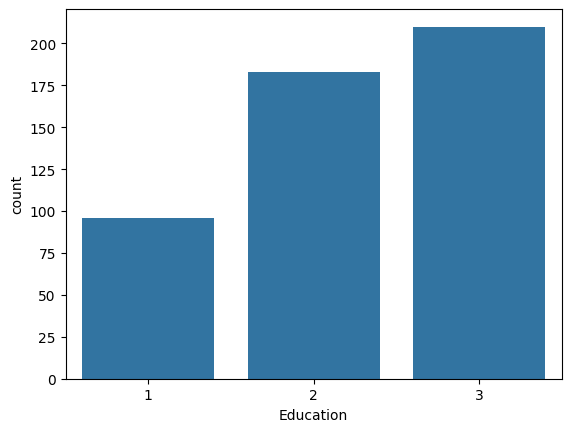

In [38]:
sns.countplot(x="Education", data=df[df['Personal Loan']==1]);

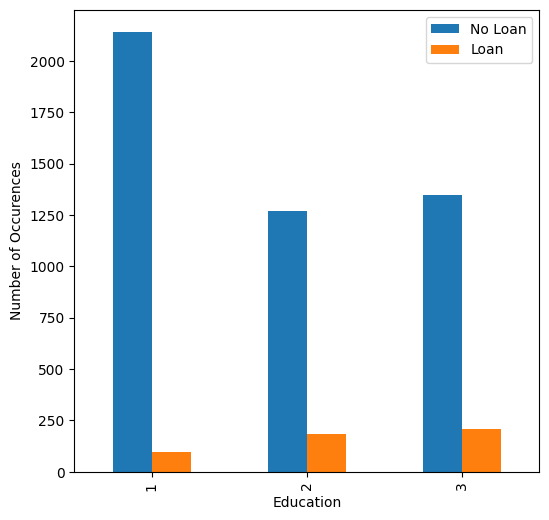

In [39]:
# Step 3  We can check the relationship using the crosstab function()
pd.crosstab(df['Education'], df['Personal Loan']).plot(kind='bar',figsize=(6,6))
plt.xlabel('Education')
plt.legend(['No Loan', 'Loan'])
plt.ylabel('Number of Occurences')
plt.show();